<a href="https://colab.research.google.com/github/ssubbinn/ESAA-YB/blob/main/movies_train_YB_2%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

우선, 한글이 깨지는 현상을 방지하기 위한 작업을 진행하고 필요한 모듈을 불러옵니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#matplotlib 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (2,813 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
movies = pd.read_table('/content/drive/MyDrive/YB_2조/미니프로젝트/1. movies /movies_train.csv',sep=',')
movies.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
movies.director.value_counts()

홍상수           7
장률            4
신재호           4
우민호           4
노진수           4
             ..
권오광           1
한윤선           1
박찬경           1
New Pistol    1
백운학           1
Name: director, Length: 472, dtype: int64

이번 프로젝트에서 분석할 데이터에 대해 간단히 살펴보겠습니다.

# **movies_train**
2010년대 한국에서 개봉한 한국영화 600개에 대한 감독, 이름, 상영등급, 관객수 등의 정보가 담긴 데이터


---

**변수 이름 및 설명**

- **title**: 영화의 제목
- **distributor**: 배급사
- **gerne**: 장르
- **release_time**: 개봉일
- **time**: 상영시간(분)
- **screening_rat**: 상영등급
- **director**: 감독이름
- **dir_prev_bfnum**: 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- **dir_prev_num**: 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
- **num_staff**: 스텝수
- **num_actor**: 주연배우수
- **box_off_num**: 관객수

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


변수의 이름, null이 아닌 것의 갯수, 각 변수의 dtype과 데이터의 크기를 알 수
있습니다.

In [ ]:
movies.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


숫자형 변수들의 갯수, 평균, 표준편차 등 간단한 분포를 살펴볼 수 있습니다.

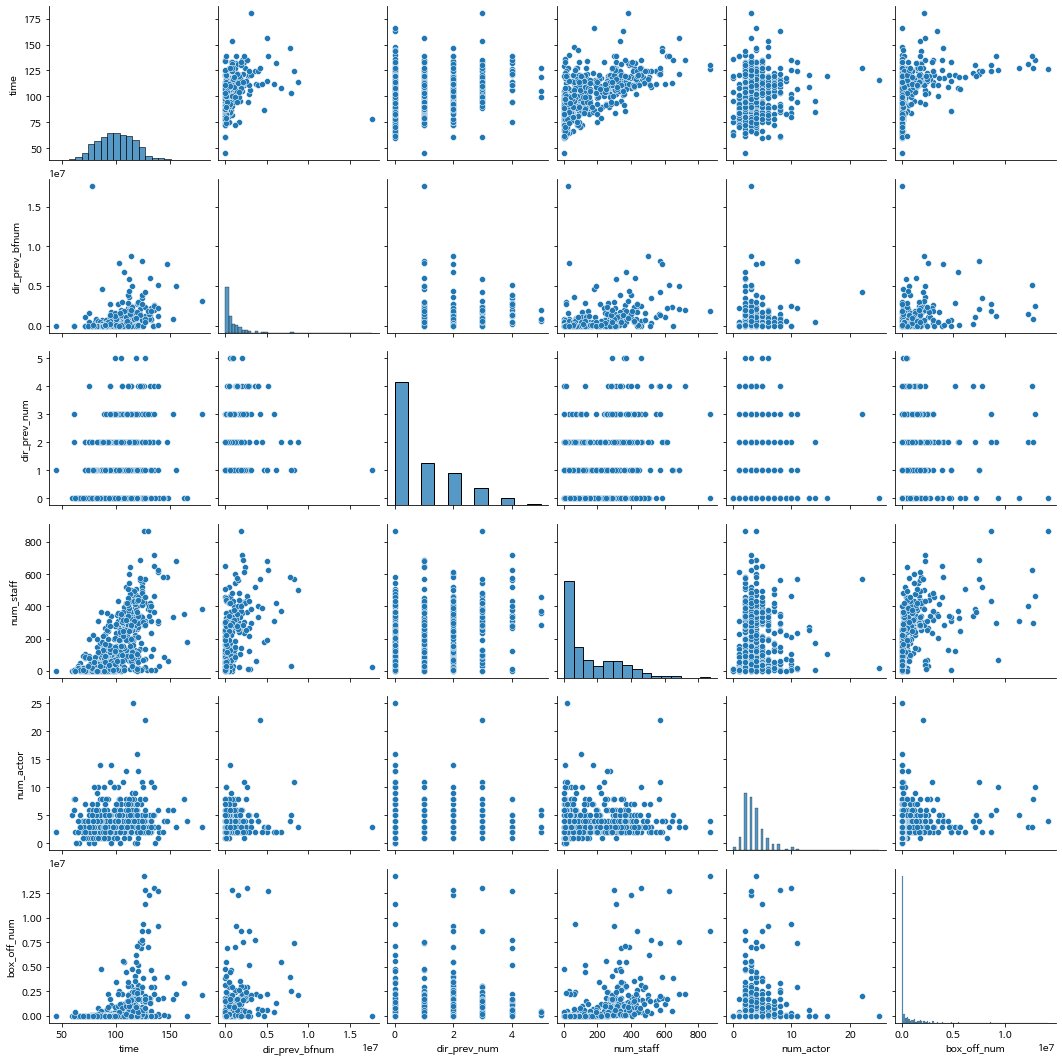

In [ ]:
sns.pairplot(movies)

다음으로는 저희 조가 설정한 가설을 검증해보겠습니다.
<br/>가설은 1. 흥행 정도 2. 장르 3. 개봉일 4. 감독의 이전 활동 크게 네 가지 카테고리로 나누어 설정했습니다.

<br/>먼저 관객수로 나타나는 흥행 정도에 영향을 미치는 요소에 대해 가설을 세우고, 분석한 결과를 보여드리겠습니다.

## **1) 흥행 정도 (관객 수)에 영향을 미치는 요소 분석**


---


**1-1) screening_rat / box_off_num: 상영등급와 관객 수의 관계**

상영 등급에 따라 관객 수에 변화가 있을 것입니다.


상영등급과 관객 수의 관계를 상자 수염 그래프를 그려서 확인합니다.

Text(0.5, 1.0, '상영등급와 관객 수의 관계')

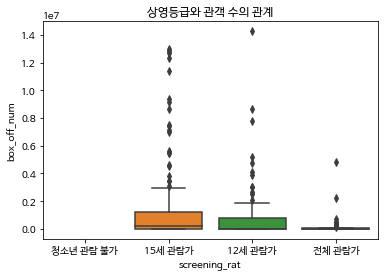

In [ ]:
fig=plt.figure()
axes=fig.add_subplot(1,1,1)

axes=sns.boxplot(x='screening_rat', y='box_off_num', data=movies, order=['청소년 관람 불가', '15세 관람가', '12세 관람가', '전체 관람가'])
axes.set_title('상영등급와 관객 수의 관계')

이번에는 상영등급과 관객 수의 관계를 막대 그래프를 그려서 확인해보겠습니다.

Text(0.5, 1.0, '상영등급와 관객 수의 관계')

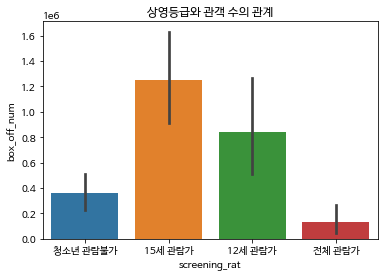

In [ ]:
fig=plt.figure()
axes=fig.add_subplot(1,1,1)

axes=sns.barplot(x='screening_rat', y='box_off_num', data=movies, order=['청소년 관람불가', '15세 관람가', '12세 관람가', '전체 관람가'])
axes.set_title('상영등급와 관객 수의 관계')

12세 관람가와 15세 관람가의 경우 연령에 도달하지 않아도 보호자를 동반한다면 관람이 가능하지만 청소년 관람불가 등급의 경우에는 보호자가 동반하여도 청소년은 관람할 수 없기 때문에 관람객 대상의 제한이 많다고 할 수 있습니다.

이 점을 고려했을 때, 위의 두 그래프를 살펴보면 청소년 관람불가 등급을 제외하고 연령 제한이 높아질수록 관객 수가 늘어나는 추세를 보임을 알 수 있습니다.

**1-2) release_time / box_off_num: 개봉일과 관객 수의 관계**

개봉일에 따라 흥행 정도에 차이가 있을 것입니다.
<br/>개봉일에 따른 흥행 정도의 차이는 영화값 인상과 관계가 있을 것입니다.

개봉일의 경우 연도, 월, 일의 정보를 포함하고 있기 때문에 일자를 살펴보는 것은 개봉일과 관객수의 관계를 살펴보기 힘들다고 판단되므로 개봉일의 연도만 따로 변수를 생성한 movies1_2를 생성하여 관계를 살펴보고자 합니다.

In [ ]:
movies1_2=movies[['release_time', 'box_off_num']]
movies1_2['release_time']=pd.to_numeric(movies1_2['release_time'].str[:4])
#연도만 잘라서 개봉년도만 잘라서 그래프를 그려보자

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


개봉일과 관객 수의 관계를 산점도로 살펴보면 다음과 같습니다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '개봉 연도와 관객 수의 관계')

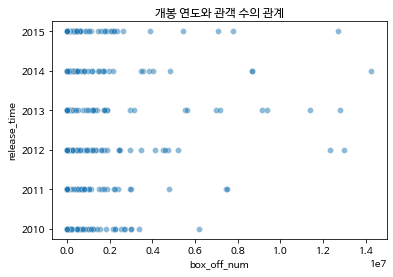

In [ ]:
fig=plt.figure()
axes=fig.add_subplot(1,1,1)

axes=sns.scatterplot('box_off_num', 'release_time',data=movies1_2, alpha=0.5)
axes.set_title('개봉 연도와 관객 수의 관계')

산점도로 두 변수의 관계를 살펴보기에는 무리가 있습니다.

그러므로 개봉연도별 관객 수의 평균을 이용하여 막대그래프를 그려 살펴보고자 합니다.

In [ ]:
#개봉연도별 관객수의 평균을 이용하여 비교

mean_box_off_num=movies1_2.groupby('release_time').mean('box_off_num')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '개봉 연도와 관객 수의 관계')

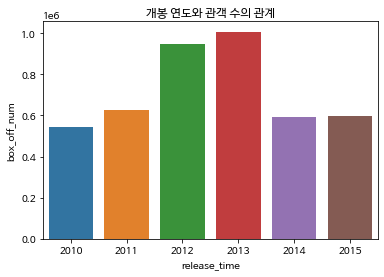

In [ ]:
fig=plt.figure()
axes=fig.add_subplot(1,1,1)

axes=sns.barplot(mean_box_off_num.index, mean_box_off_num.box_off_num)
axes.set_title('개봉 연도와 관객 수의 관계')

이번에는 개봉연도별 관객 수의 합을 이용하여 막대그래프를 그려 살펴보겠습니다.

In [ ]:
#개봉연도별 관객수의 합을 이용하여 비교

sum_box_off_num=movies1_2.groupby('release_time').sum('box_off_num')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '개봉 연도와 관객 수의 관계')

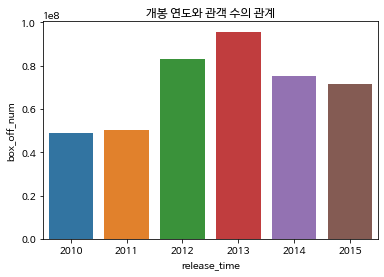

In [ ]:
fig=plt.figure()
axes=fig.add_subplot(1,1,1)

axes=sns.barplot(sum_box_off_num.index, sum_box_off_num.box_off_num)
axes.set_title('개봉 연도와 관객 수의 관계')

위 두 그래프를 살펴보면 관객 수의 평균, 합으로 보았을 때, 추세가 비슷함을 알 수 있습니다.

2010년부터 2013년까지 관객 수가 꾸준히 증가하는 반면 2014년부터 관객 수가 감소함을 알 수 있고, 특히 2014년에는 큰 폭으로 감소했음을 알 수 있습니다.

### **2010년부터 2013년까지 평균 관객수와 총 관객수가 증가하였지만 2014년부터 관객수가 감소한 것을 알 수 있다.**

2009년 주말 성인 기준 8000원이었던 관람료는 5년 새 2000원 올라 2014년 1만원 시대를 연 바 있다.

‘좌석 가격 차등제’는 올해 3월부터 시행됐다. 업계 1위 CGV는 국내 3대 멀티플렉스 중 처음으로 이 정책을 도입했다. 2014년 1차 가격 다양화 제도를 도입하며 4단계로 나눴던 주중(월~목) 시간대를 6단계로 확대했다.

출처 : 시사저널(http://www.sisajournal.com)

위 자료를 살펴보면 2014년에 영화 관람료가 상승한 것처럼 데이터에 있는 변수 외의 다른 요인이 개봉 연도별 관객 수에 영향을 주었음을 추측할 수 있습니다.

**1-3) time / box_off_num: 상영시간과 관객 수의 관계**

상영 시간에 따라 흥행 정도에 차이가 있을 것입니다.

상영시간과 관객 수를 산점도를 이용하여 살펴보고자 합니다.
이때 관객수에 따라 색상을 변경하여 효과적을 살펴보겠습니다.

Text(0.5, 1.0, '상영시간와 관객 수의 관계')

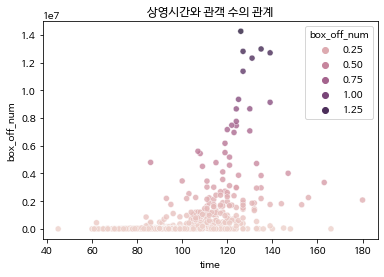

In [ ]:
fig=plt.figure()
axes=fig.add_subplot()
axes=sns.scatterplot(x='time', y='box_off_num', data=movies, hue='box_off_num', alpha=0.8)
axes.set_title('상영시간와 관객 수의 관계')

상영시간이 120~140분인 영화의 경우 다른 상영시간 영화에 비해 관객 수가 많은 영화가 많은 것을 확인해볼 수 있습니다.

**1-4) num_staff / box_off_num: 스텝 수와 관객 수의 관계**

많은 스탭이 투입된 영화가 더욱 흥행했을 것입니다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '스텝 수와 관객 수의 관계')

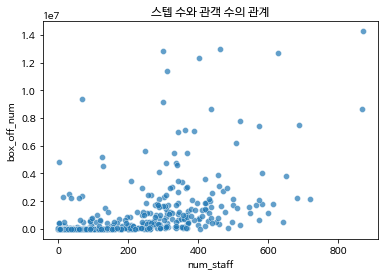

In [ ]:
fig=plt.figure()
graph1=fig.add_subplot(1,1,1)

graph1=sns.scatterplot('num_staff', 'box_off_num',data=movies, alpha=0.7)
graph1.set_title('스텝 수와 관객 수의 관계')

Text(0.5, 1.0, '스텝 수와 관객 수의 관계')

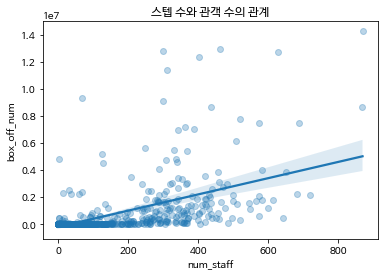

In [ ]:
fig=plt.figure()
graph1=fig.add_subplot(1,1,1)

graph2=sns.regplot(data=movies,x='num_staff', y='box_off_num',scatter_kws={'alpha':0.3})
graph1.set_title('스텝 수와 관객 수의 관계')

산점도만으로는 분포가 뚜렷하지 않아 회귀선도 추가해보았습니다. 스탭수가 늘어남에 따라 관객수도 대체로 늘어나는 것을 확인할 수 있습니다. 하지만, 스텝이 많은 데이터의 표본이 적기 때문에 예측에 오류가 있을 수 있습니다.

**1-5) title / box_off_num: 영화의 제목과 관객 수의 관계**

영화의 제목 길이에 따라 흥행 정도에 변화가 있을 것입니다.

In [ ]:
title_len=[]
title=movies['title']
title_list=title.to_list()
for i in title_list:
  title_len.append(len(i))

In [ ]:
movies['title_len']=title_len
movies.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,title_len
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,6
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,4
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,9
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,8
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '제목 길이와 관객 수의 관계')

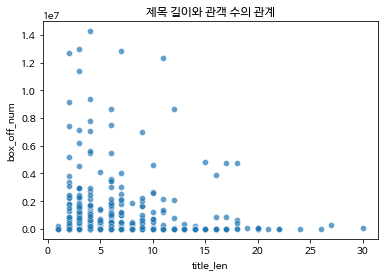

In [ ]:
fig=plt.figure()
graph1=fig.add_subplot(1,1,1)

graph1=sns.scatterplot('title_len', 'box_off_num',data=movies, alpha=0.7)
graph1.set_title('제목 길이와 관객 수의 관계')

제목의 길이는 0~6자사이에 많은 데이터가 존재하고, 제목의 길이와 관객 수는 뚜렷한 관계를 보이지 않습니다.

그 다음으로, 장르에 따른 변화에 대해 가설을 세우고, 분석한 결과를 보여드리겠습니다.

## **2) 장르에 따른 변화 분석**

---
**2-1) screening_rat / gerne: 장르에 따른 상영등급의 분포**

공포 영화는 비교적 상영 등급이 높을 것이고 애니메이션은 낮을 것이라고 생각합니다. 즉 장르에 따라 상영 등급에 변화가 있을 것입니다.

<br/>이를 막대그래프로 그려 비교해보겠습니다.

In [ ]:
#장르별로 상영등급을 세어 나타내보자.
movies.groupby('genre')['screening_rat'].value_counts()

genre   screening_rat
SF      15세 관람가           6
        12세 관람가           3
        청소년 관람불가          3
        전체 관람가            1
공포      청소년 관람불가         22
        15세 관람가          19
        12세 관람가           1
느와르     청소년 관람불가         18
        15세 관람가           9
다큐멘터리   전체 관람가           52
        12세 관람가          23
        15세 관람가          17
        청소년 관람불가          1
드라마     청소년 관람불가         78
        15세 관람가          76
        12세 관람가          50
        전체 관람가           17
멜로/로맨스  청소년 관람불가         46
        15세 관람가          21
        12세 관람가          10
        전체 관람가            1
뮤지컬     전체 관람가            4
        12세 관람가           1
미스터리    15세 관람가           9
        청소년 관람불가          8
서스펜스    청소년 관람불가          2
애니메이션   전체 관람가           14
        12세 관람가           3
        청소년 관람불가          3
        15세 관람가           1
액션      15세 관람가          16
        청소년 관람불가         11
        12세 관람가           1
코미디     15세 관람가          28
        청소년 관람불가         1

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


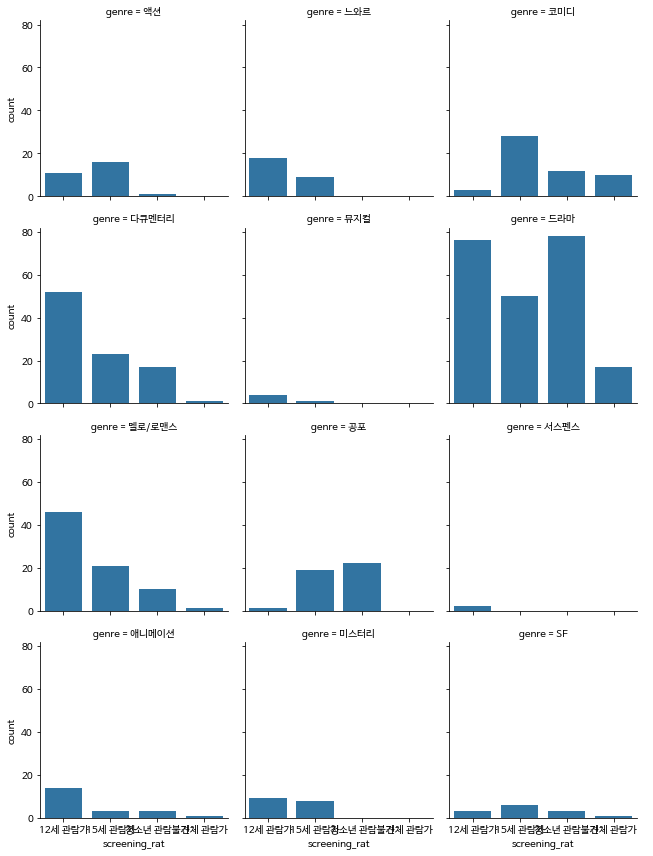

In [ ]:
#어떤 장르가 상영등급이 높은 것이 우세한지 낮은 것이 우세한지 알아보기 위해 장르별로 상영등급을 출력한다.

genre_time_plot=sns.FacetGrid(movies, col='genre', col_wrap=3)
genre_time_plot=genre_time_plot.map(sns.countplot, 'screening_rat')
genre_time_plot=genre_time_plot.add_legend()

대체적으로 장르에 따라 상영등급의 차이가 크지 않고 다큐멘터리의 경우 상영등급이 낮은 경우가 더 많습니다. 이때 관측되는 데이터 수는 장르별로 다르기 때문에 장르별 그래프들끼리 'screening_rat'을 직접 비교해서는 안 된다는 것에 주의해야합니다.

**2-2) time / genre: 장르와 상영시간 간의 관계**

애니메이션은 비교적 상영시간이 짧고 뮤지컬은 길 것이라고 예측할 수 있습니다. 이처럼 장르에 따라 상영 시간에 변화가 있을 것입니다.

<br/>이를 막대그래프로 그려 비교해보도록 하겠습니다.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

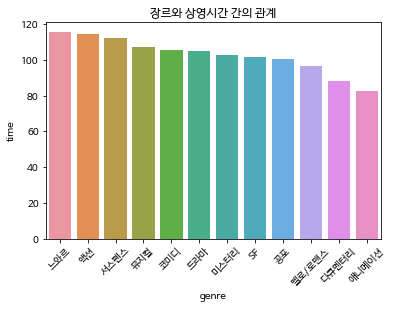

In [ ]:
#장르별 상영시간의 평균
genre_time_mean= movies.groupby('genre')['time'].mean().to_frame().sort_values(ascending=False,by='time')
genre_time_mean

time_genre_plot = plt.subplots()
time_genre_plot=sns.barplot(x=genre_time_mean.index, y='time',data=genre_time_mean)
time_genre_plot.set_title('장르와 상영시간 간의 관계')
time_genre_plot.set_xlabel('genre')
time_genre_plot.set_ylabel('time')
plt.xticks(rotation=45)

액션과 느와르의 경우 상영시간이 길게 나타나고 다큐멘터리와 애니메이션이 상영시간이 비교적 짧게 나타나는 것을 볼 수 있습니다.

**2-3) num_actor / genre: 장르와 주연배우수 간의 관계**

드라마나 코미디, 액션같은 장르일 경우 주연 배우수가 더 많을 것이라고 예측됩니다. 즉, 장르에 따라 주연배우 수에 차이가 있는지 그래프를 통해 알아보겠습니다.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

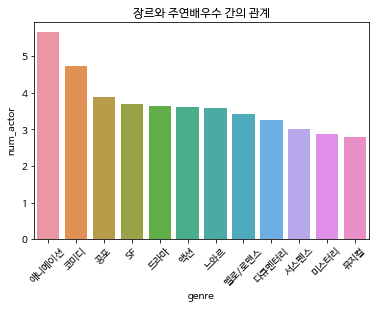

In [ ]:
#장르별 주연배우수의 평균
genre_num_actor_mean= movies.groupby('genre')['num_actor'].mean().to_frame().sort_values(ascending=False,by='num_actor')
genre_num_actor_mean

time_genre_plot = plt.subplots()
time_genre_plot=sns.barplot(x=genre_num_actor_mean.index, y='num_actor',data=genre_num_actor_mean)
time_genre_plot.set_title('장르와 주연배우수 간의 관계')
time_genre_plot.set_xlabel('genre')
time_genre_plot.set_ylabel('num_actor')
plt.xticks(rotation=45)

애니메이션에서 주연배우수 평균값이이 가장 큽니다. 위 그래프를 바탕으로 애니메이션에서 주연배우수가 가장 많다고 해석할 수 있으며 다른 장르들간의 차이는 크게 차이가 나지 않았습니다.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

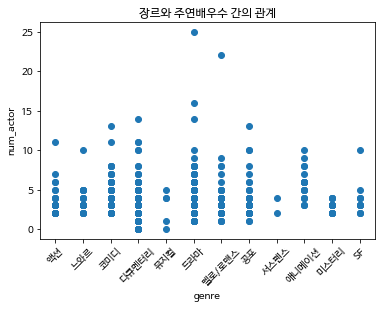

In [ ]:
#평균으로만 확인했으므로 그래프 하나를 더 그려 이상치가 있는지 확인하자.
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(movies['genre'], movies['num_actor'])
axes1.set_title('장르와 주연배우수 간의 관계')
axes1.set_xlabel('genre')
axes1.set_ylabel('num_actor')
plt.xticks(rotation=45)

드라마 그리고 멜로/로맨스 장르에서 이상치가 존재하는 것을 확인할 수 있습니다. 하지만 앞서 그린 평균을 이용한 막대그래프 결과에는 뚜렷한 영향을 주지 않았다는 것을 알 수 있습니다.

**2-4) num_staff / genre: 장르와 스텝 수 간의 관계**

영화 장르에 따라 스텝 수에 차이가 있을 것입니다.

Text(0.5, 1.0, '장르와 스텝 수 사이의 관계')

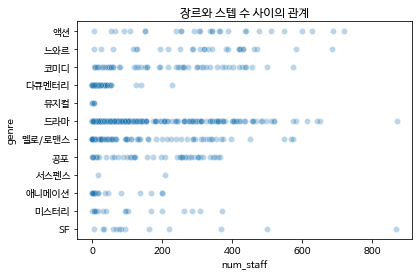

In [ ]:
#단순히 장르와 스텝 수를 비교하는 산점도를 그려보자.
fig=plt.figure()
axes=fig.add_subplot(1,1,1)

axes=sns.scatterplot(x='num_staff', y='genre', data=movies, alpha=0.3)
axes.set_title('장르와 스텝 수 사이의 관계')

한 눈에 들어오진 않지만 SF, 드라마, 액션이나 느와르 장르에 많은 스탭이 투입되었고 뮤지컬, 서스펜스, 애니메이션 등의 장르에는 상대적으로 적게 투입된 것으로 보입니다. 스탭 수의 평균치로도 비교 해보겠습니다.

Text(0.5, 1.0, '장르와 평균 스텝 수 사이의 관계')

<Figure size 432x288 with 0 Axes>

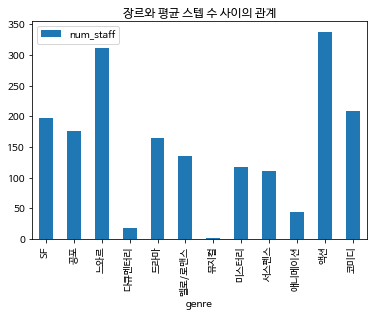

In [ ]:
#장르별 스탭 수의 평균치를 계산하여 막대 그래프를 그려보자.
staff_mean=movies[['genre','num_staff']].groupby('genre').mean()

fig=plt.figure()
mean_plot=staff_mean.plot(kind = 'bar',)
mean_plot.set_title('장르와 평균 스텝 수 사이의 관계')

평균을 내 비교해보면 조금 더 뚜렷하게 차이가 나타나는데, 액션, 느와르, 코미디 장르가 참여한 스텝의 평균 인원이 가장 많습니다. 반면 뮤지컬, 다큐멘터리, 애니메이션에 참여한 스텝의 평균 인원이 적습니다. 위의 산점도와 차이를 보이는 이유는 장르당 제작된 영화의 수가 크게 차이나서 극단적인 값의 영향을 받은 것으로 보입니다.

**2-5) distributor / genre**

배급사에 따라 다루는 장르에 차이가 있을 것입니다.

Text(0.5, 1.0, '장르와 배급사 사이의 관계')

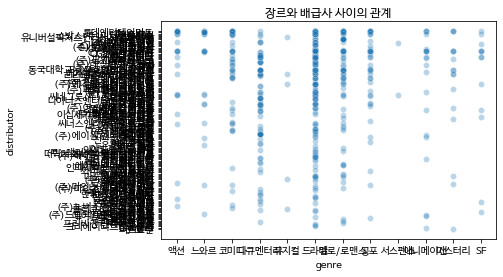

In [ ]:
#단순히 산점도를 그려보자
fig=plt.figure()
axes=fig.add_subplot(1,1,1)

axes=sns.scatterplot(x='genre', y='distributor', data=movies, alpha=0.3)
axes.set_title('장르와 배급사 사이의 관계')

In [ ]:
movies['distributor'].value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

두 변수가 모두 범주형이고, 배급사 종류가 169개로 너무 많아 그래프가 눈에 들어오지 않습니다. 영화 제작 경험이 적은 배급사는 분석할 의미가 없으므로 영화를 많이 제작해 본 제작사 20개만 추출해 따로 분석 해보겠습니다.

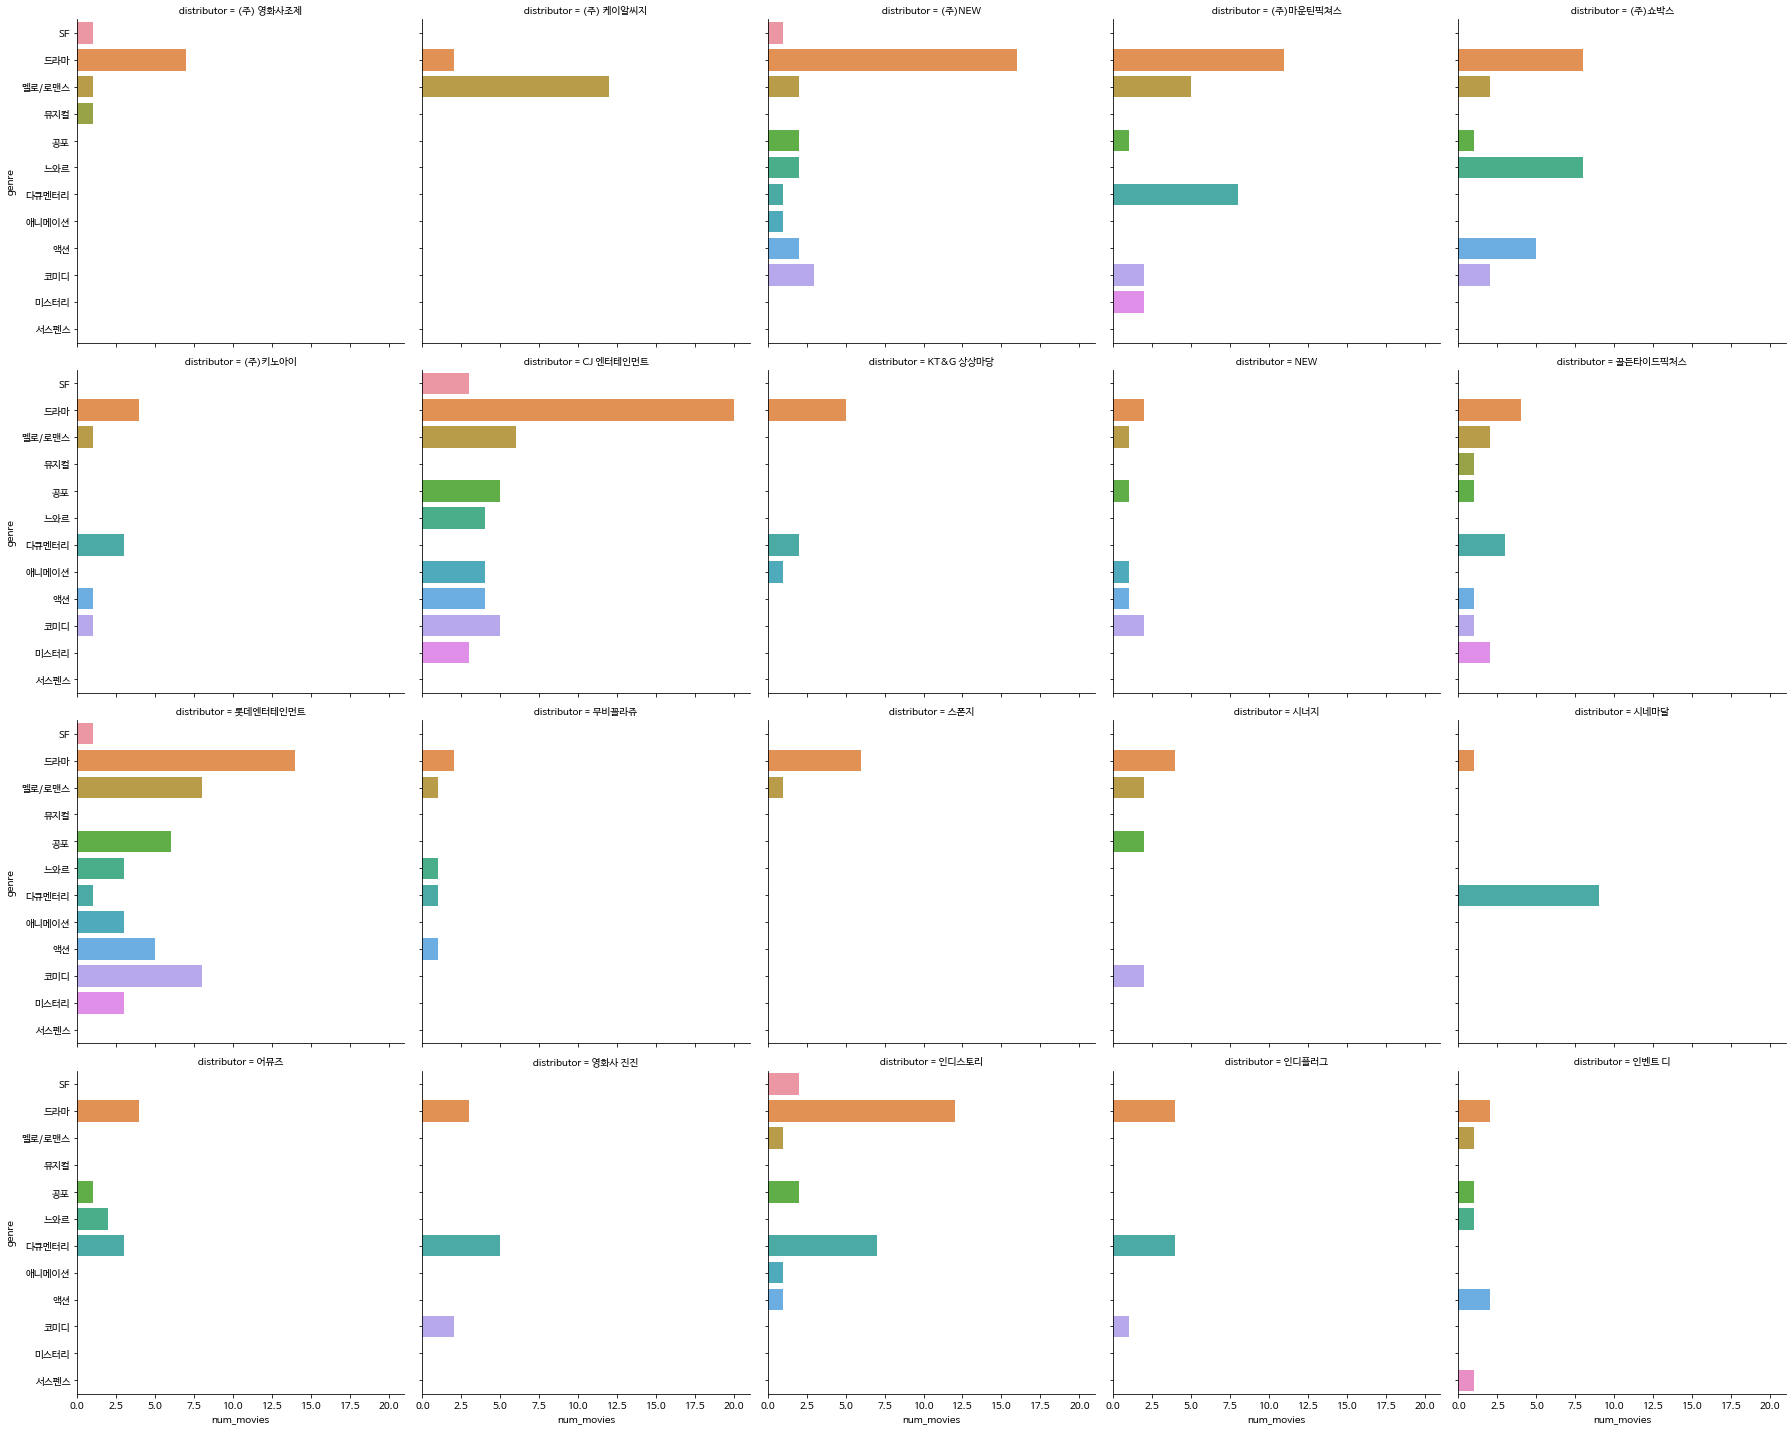

In [ ]:
distributor_20=movies['distributor'].value_counts().head(20)

movies_dist_gen=movies.groupby(['distributor', 'genre'])['title'].count().reset_index()
movies_dist_gen.columns=['distributor', 'genre', 'num_movies']

movies_dist=movies_dist_gen[movies_dist_gen['distributor'].isin(distributor_20.index)].copy()

ax = sns.catplot(data=movies_dist, x='num_movies', y='genre',
            kind='bar', col='distributor', col_wrap=5)

확실히 영화 제작 경험이 많은 롯데엔터테인먼트와 CJ 엔터테인먼트는 다양한 장르의 영화를 제작했습니다. 많은 제작사가 드라마와 멜로/로맨스 장르의 영화를 주로 제작합니다다. 드라마와 멜로/로맨스를 제외하면 인디플러그, 인디스토리, 영화사 진진, (주)키노아이, (주) 마운틴픽쳐스 등의 제작사에서 다큐멘터리 장르의 영화를 다수 제작했습니다.

세 번째로는 개봉일에 따른 변화에 대해 가설을 세우고, 분석한 결과를 보여드리겠습니다.

## **3) 개봉일에 따른 변화 분석**

**3-1) release_time / title: 개봉 일과 영화 제목 길이 간의 관계**

개봉 일이 비교적 최근일 수록 영화 제목 길이가 짧을 것입니다.
<br/>짧고 함축적인 제목이 관심을 끄는 최근 경향이 반영되었을 것이라고 예상했습니다.


In [ ]:
movies_rel_title=movies[['release_time', 'title']]
movies_rel_title['release_time']=pd.to_numeric(movies_rel_title['release_time'].str[:4])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
movies_rel_title['title_len']=movies_rel_title['title'].apply(lambda x:len(x))
movies_rel_title.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,release_time,title,title_len
0,2012,개들의 전쟁,6
1,2015,내부자들,4
2,2013,은밀하게 위대하게,9


Text(0.5, 1.0, '개봉일과 영화 제목 글자 수의 관계')

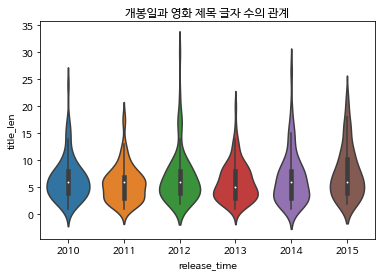

In [ ]:
fig=plt.figure()
axes=fig.add_subplot(1,1,1)

axes=sns.violinplot(x='release_time', y='title_len', data=movies_rel_title)
axes.set_title('개봉일과 영화 제목 글자 수의 관계')

예상과 달리 눈에 띄는 경향은 딱히 없어 보입니다. 영화 제목 5글자 내외에 데이터가 몰려있습니다.

마지막으로 감독의 이전 경력과 다른 변수들이 연관이 있는지에 대한 가설을 세우고, 분석한 결과를 보여드리겠습니다.

## **4) 신인 감독 vs 경력 감독 분석**

---

**4-1) director / dir_prev_num / release_time**

첫 작품인 신인 감독의 수가 점점 많아질 것입니다.
<br/>대중이 영화에 관심이 높아지며 신인 감독의 수가 점점 많아질 것이라고 예상했습니다.


In [ ]:
# 첫 작품인 신인 감독
dir_new = movies[movies['dir_prev_num'] == 0]
dir_new.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,title_len
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,6
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526,4
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778,15
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868,5
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745,6


In [ ]:
# release_time 날짜 형태로 변환: release_Year 변수 추가
dir_new['release_time'] = pd.to_datetime(dir_new['release_time'],format='%Y-%m-%d')
dir_new['release_Year'] = dir_new['release_time'].dt.year

# 연도별 신인 감독 수: dir_new_count dataFrame 생성
dir_new_count = pd.DataFrame(dir_new.groupby('release_Year')['director'].count())
dir_new_count

# 인덱스 새로 지정
dir_new_final = dir_new_count.reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, '신인 감독 수')

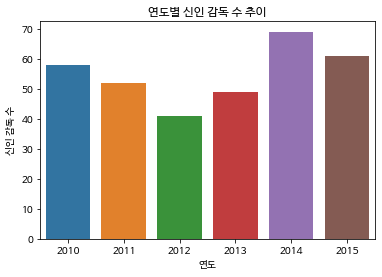

In [ ]:
ax = plt.subplots()
ax = sns.barplot(x = 'release_Year', y = 'director', data = dir_new_final)
ax.set_title('연도별 신인 감독 수 추이')
ax.set_xlabel('연도')
ax.set_ylabel('신인 감독 수')

2013년, 2014년은 전년도보다 신인 감독의 수가 증가했지만 그 외에는 예상과 달리 연도별 신인 감독의 수가 감소했습니다.

**4-2) director / dir_prev_num/ box_off_num: 제작에 참여한 영화의 개수와 현 영화 관객 수 사이의 관계**

제작 경험이 있는지에 따라 흥행 정도에 차이가 있을 것입니다.


In [ ]:
dir2 = movies.groupby('director')['dir_prev_num', 'box_off_num'].sum()
dir2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,dir_prev_num,box_off_num
director,,
New Pistol,0,2595
강석필,0,8695
강성옥,0,17912
강우석,3,5094896
강의석,0,152
...,...,...
황석호,0,1068
황욱,0,1504
황유식,2,480


Text(0, 0.5, '현 영화 관객 수')

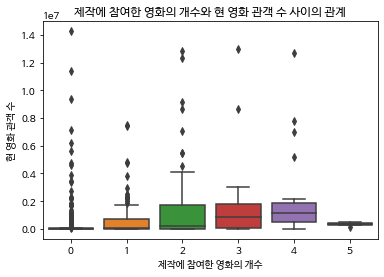

In [ ]:
ax = plt.subplots()
ax = sns.boxplot(x='dir_prev_num', y='box_off_num', data = movies)
ax.set_title('제작에 참여한 영화의 개수와 현 영화 관객 수 사이의 관계')
ax.set_xlabel('제작에 참여한 영화의 개수')
ax.set_ylabel('현 영화 관객 수')

이전 작품이 0개부터 2개까지는 관객이 늘어났지만 그 후 오히려 다작할 감독일수록 영화는 관객 수가 적었습니다.

**4-3) dir_prev_bfnum / box_off_num: 제작에 참여한 영화의 평균 관객 수와 현 영화 관객 수 사이의 관계**

영화를 제작한 경험이 있는 경우, 관객 수가 많고 영화를 만든 경험이 많은 감독의 영화가 더욱 흥행했을 것입니다.


In [ ]:
# 신인 감독이 아닌 경우
dir_old = movies[movies['dir_prev_num'] != 0]
dir_old.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,title_len
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,4
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,9
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,8
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,4
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211,14


Text(0, 0.5, '현 영화 관객 수')

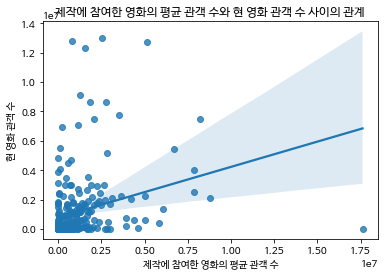

In [ ]:
ax = plt.subplots()
ax = sns.regplot(x = 'dir_prev_bfnum', y = 'box_off_num', data = dir_old)
ax.set_title('제작에 참여한 영화의 평균 관객 수와 현 영화 관객 수 사이의 관계')
ax.set_xlabel('제작에 참여한 영화의 평균 관객 수')
ax.set_ylabel('현 영화 관객 수')

회귀선이 증가하는 추세를 보이긴 하나, 구간이 너무 넓고 원점에 데이터가 몰려 있어 가설을 뒷받침하기엔 무리가 있어 보입니다.

이상으로 YB 2조의 첫 번째 미니 프로젝트 보고서를 마치겠습니다.